# Modelo probabilistico vs matematico

In [38]:
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df

,date,World,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,Western Sahara,Yemen,Zambia,Zimbabwe
0,2019-12-31,27,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-03,17,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-04,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
5,2020-01-05,15,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
6,2020-01-06,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
7,2020-01-07,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
8,2020-01-08,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
9,2020-01-09,0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [40]:
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,Ecuador
0,-1,0.0
1,0,0.0
2,1,0.0
3,2,0.0
4,3,0.0
5,4,0.0
6,5,0.0
7,6,0.0
8,7,0.0
9,8,0.0


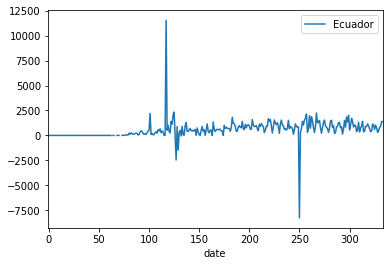

In [41]:
df.plot(x ='date', y='Ecuador')

In [42]:
filtro = df["Ecuador"][61:]
media = filtro.mean()
mediana = filtro.median()
print('MEDIANA : -->',mediana)
print('MEDIA : -->',media)

MEDIANA : --> 670.0
MEDIA : --> 709.6988847583643


In [43]:
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
df_t = df_t.replace(np.nan, 0)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']]
y = list(df_t.iloc [:, 1])
x = list(df_t.iloc [:, 0])
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

191579


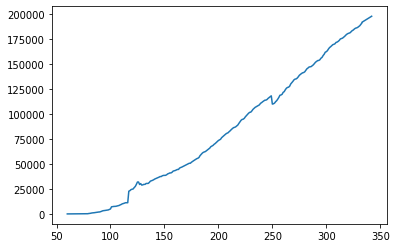

In [44]:
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

**1. Comparar el modelo de predicion matematico vs probabilidad.**

### Modelo probabilistico

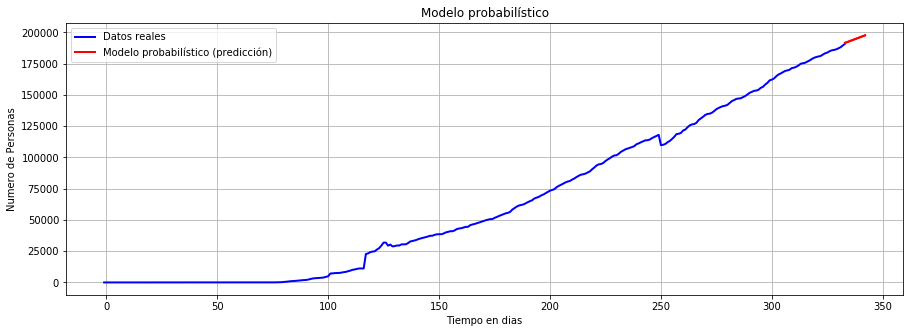

In [45]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(x[:len(x)-9], y[:len(x)-9],'b', alpha=1, lw = 2, label = 'Datos reales')
ax.plot(x[len(x)-10:], y[len(x)-10:],'r', alpha=1, lw = 2, label = 'Modelo probabilístico (predicción)')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_title("Modelo probabilístico")
ax.legend()
ax.grid()
x_matematico = x[:]
y_matematico = y[:]
ax.plot(x[len(x)-10:], y[len(x)-10:],'r', alpha=1, lw = 2, label = 'Modelo probabilístico (predicción)')

In [46]:
prediccion_siguiente = int(y[-1] + mediana)
print('MODELO PROBABILISTICO')
print('TOTAL DE CASOS y MEDIANA: ',prediccion_siguiente)
print('TOTAL, FECHA ACTUAL: ',y[321])
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
print('ESTIMACION DE CONTAGIOS:',y[-1]+7)

MODELO PROBABILISTICO
TOTAL DE CASOS y MEDIANA:  198279
TOTAL, FECHA ACTUAL:  180295.0
ESTIMACION DE CONTAGIOS: 202306


### Modelo polinomial

CONTAGIOS ACTUALES: 91916


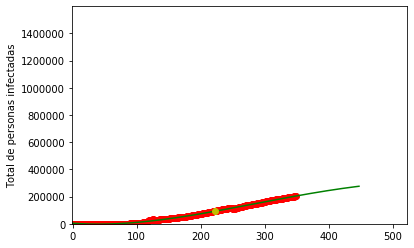

In [47]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
pf = PolynomialFeatures(degree = 4)    
X = pf.fit_transform(np.array(x).reshape(-1, 1))

regresion_lineal = LinearRegression()

regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+100))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)

print ('CONTAGIOS ACTUALES:', int(prediccion_entrenamiento[222]))

plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.ylim((-300,max(y)*7.9))
plt.xlim((min(x)*0.9,max(x)*1.5))
plt.ylabel("Total de personas infectadas")
plt.plot(222,prediccion_entrenamiento[222], 'oy')
plt.show()

**3.Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.**

Una semana antes
Media 854.3333333333334
Mediana 883.0
Predicion 185759

CASOS POSIBLES
DIA 1 : 185759
DIA 2 : 186642
DIA 3 : 187525
DIA 4 : 188408
DIA 5 : 189291
DIA 6 : 190174
DIA 7 : 191057


<function matplotlib.pyplot.show(*args, **kw)>

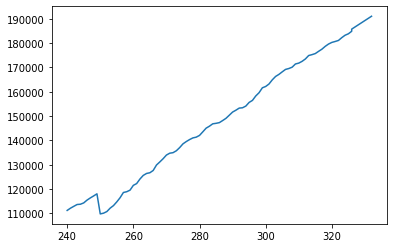

In [66]:
TotalSemanaPasada=df['Ecuador'][241:len(df)-7]
y_semanantes = list(df_t.iloc [:, 1])
x_semanantes = list(df_t.iloc [:, 0])
for i in range (7):
    y_semanantes.pop(-1)
    x_semanantes.pop(-1)
media_semanantes=TotalSemanaPasada.mean()
print ('Una semana antes')
print('Media', media_semanantes)
mediana_semanantes=TotalSemanaPasada.median()
print('Mediana', mediana_semanantes)
prediccion_semana_antes = int(y_semanantes[-1] + mediana_semanantes)
print('Predicion',prediccion_semana_antes)

for i in range(x_semanantes[-1], x_semanantes[-1]+7):
    x_semanantes.append(i)
    y_semanantes.append(int(y_semanantes[-1]+mediana_semanantes))
print('')
print('CASOS POSIBLES')
for i in range(7):
    print('DIA',i+1,':',round(prediccion_semana_antes))
    prediccion_semana_antes=prediccion_semana_antes+mediana_semanantes
    
plt.plot(x_semanantes[241:], y_semanantes[241:])
plt.show

Predicción una semana antes: 13691.0 contagiados


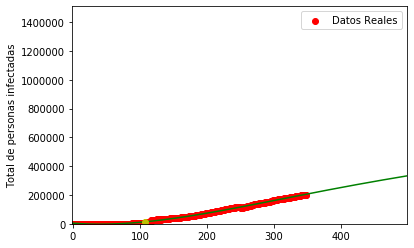

In [68]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

pf = PolynomialFeatures(degree = 4)
X = pf.fit_transform(np.array(x_semanantes).reshape(-1, 1))

regresion_lineal = LinearRegression()
regresion_lineal.fit(X,y_semanantes ) 

pred_x = list(range(0,max(x_semanantes)+200))
puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
print ('Predicción una semana antes:', round(prediccion_entrenamiento[108]), 'contagiados')
plt.plot(pred_x, prediccion_entrenamiento, color='green')
plt.scatter(x,y,label="Datos Reales",color="red")
plt.ylim((-300,max(y_semanantes)*7.9))
plt.xlim((min(x_semanantes)*0.9,max(x_semanantes)*1.5))
plt.ylabel("Total de personas infectadas")
plt.plot(108,prediccion_entrenamiento[108], 'oy')
plt.legend()
plt.show()

## Conclusion

Una modelo probabilistico nos ayudara a preveer el numero de contagios posibles en los siguientes dias de una manera mas acertda